### 크리스마스 선물 찾기
1. 네이버 지식인에서 크리스마스 선물 키워드로 크롤링
2. 자연어 처리하여 워드클라우드로 표출

### 1. 크롤링

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc
rc('font', family='Arial Unicode MS')

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import requests
import urllib
import time

In [5]:
html = 'https://kin.naver.com/search/list.nhn?query={key_word}&page={num}'

req = Request(html.format(num=1, key_word=urllib.parse.quote('크리스마스 선물')))
req.add_header('Referer', 'http://www.naver.com/')

response = urlopen(req)

soup = BeautifulSoup(response, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="크리스마스 선물의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN '질문하기'를 해보세요." name="description">
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config">
<link href="https://ssl.pstatic.net/static.kin/static/pc/20210107140856/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20210107140856/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20210107140856/css/min/other.css" rel="stylesheet" type="text/css"/>
<script>
	
	var pcDomain = "kin.naver.com";
	var pcDomainWithProtocol = "https://kin.naver.com";
	var pcKinServiceProtocol = "https";

	var mobileDomain = "m.kin.naver.com";
	var mobileDomainWithProtocol = "https://m.kin.naver.com";
	var mobileKinServiceProtocol = "https";

	var 

In [7]:
links = soup.find_all('dt')
links[0]

<dt>
<a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.nhn?d1id=6&amp;dirId=6130202&amp;docId=376637811&amp;qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=1" target="_blank"><b>크리스마스 선물</b>로 2만원대</a>
</dt>

In [8]:
links[0].a['href']

'https://kin.naver.com/qna/detail.nhn?d1id=6&dirId=6130202&docId=376637811&qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&enc=utf8§ion=kin&rank=1&search_sort=0&spq=1'

In [9]:
html = links[0].a['href']

r = requests.get(links[0].a['href'])
soup_tmp = BeautifulSoup(r.text, 'html.parser')

soup_tmp


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="width=1024" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="none" name="msapplication-config">
<meta content="index,nofollow" name="robots">
<meta content="크리스마스 선물로 2만원대" property="og:title">
<meta content="https://kin.naver.com/qna/detail.nhn?d1id=6&amp;dirId=6130202&amp;docId=376637811&amp;qb=7YGs66as7Iqk66eI7IqkIOyEoOusvA==&amp;enc=utf8%C2%A7ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=1" property="og:url">
<meta content="https://ssl.pstatic.net/static/kin/common/kin_thumbnail_new_w1000.png" property="og:image"/>
<meta content="크리스마스 선물로 2만원대" property="og:description"/>
<meta content="네이버 지식iN" property="og:article:author"/>
<meta content="https://kin.naver.com" property="og:article:author:url"/>
<title>
		크리스마스 선물로 2만원대 : 지식iN
	</title>
<link href="/favicon.ico?v=2.2" rel="sh

In [11]:
soup_tmp.find_all('div', '_endContentsText')

[<div class="_endContentsText c-heading-answer__content-user"><div class="se-viewer se-theme-default" lang="ko-KR"> <!-- SE_DOC_HEADER_START --> <!--@CONTENTS_HEADER--> <!-- SE_DOC_HEADER_END --> <div class="se-main-container"> <div class="se-component se-text se-l-default" id="SE-42dcf562-1a01-41ab-a479-3cbfd9637ec4"> <div class="se-component-content"> <div class="se-section se-section-text se-l-default"> <div class="se-module se-module-text"> <!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align- " id="SE-41e8f6af-09ac-42ff-a811-d3c59737c21f" style=""><span class="se-fs- se-ff- " id="SE-240206e1-6f84-4e70-8633-3047ea09b07c" style="">크리스마스 선물 몇가지 추천드릴게요.</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align- " id="SE-3c1f6427-75fd-45af-aee8-035d47be8834" style=""><span class="se-fs- se-ff- " id="SE-65e3f4e6-ee98-4cb7-959f-e7516a46b7b1" style="">받은사람들의 만족도가 높았던것만 뽑아서 알려드릴게요.</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p cla

In [12]:
contents = []

search_result = soup_tmp.find_all('div', '_endContentsText')

for each in search_result:
    contents.append(each.get_text())

contents

['         크리스마스 선물 몇가지 추천드릴게요.받은사람들의 만족도가 높았던것만 뽑아서 알려드릴게요.\u200b\u200bhttps://tinyurl.com/y93taff7              이플린 별빛 트리 무드등 COUPANG tinyurl.com            \u200b\u200bhttps://tinyurl.com/y6vzk5mz              디씨즈 휴대용 보조배터리겸용 충전식 손난로 DISIZ HW-100 COUPANG tinyurl.com            \u200b\u200bhttps://tinyurl.com/ycgf2z6j              유엠투 LED 무드등 조명 10W 고속 무선 충전기 Qi10W COUPANG tinyurl.com            \u200b\u200b많은 후기들이 있으니 직접 보시구 결정하세요.가격도 비싸지 않고 부담되지 않아서 만족도가 높네요.파트너스는 추가수익을 기대할 수 있어요.\u200b     ',
 '         러쉬 슈랙팩이요     ',
 '         ● 2021년 예쁜 다이어리●이어폰●초콜릿●문화상품권●텀블러     ',
 '         이런건 어떠실까요?금액대 별로 추천드려요\u200b1천원대https://coupa.ng/bNH3k5              싼디샵 캐릭터수면양말 겨울양말 케이스포함 성인용 아동용 COUPANG coupa.ng            \u200b3천원대https://coupa.ng/bNH3tf              야미스토리 과자선물세트 빅사이즈 단단트레이 야미 과자 세트 선물세트 COUPANG coupa.ng            \u200b2만원대 Ahttps://coupa.ng/bNH3ve              크리스마스 초대형 과자 선물세트 COUPANG coupa.ng            \u200b2만원대 Bhttps://coupa.ng/bNdcaT              바비온 가성비100 올인원 전기면도기 C

In [15]:
from tqdm.notebook import tqdm
import time

present_candi_text = []

for each_link in tqdm(links):
    r = requests.get(links[0].a['href'])
    soup_tmp = BeautifulSoup(r.text, 'html.parser')

    search_result = soup_tmp.find_all('div', '_endContentsText')
    
    time.sleep(0.1)
    
    for each in search_result:
        present_candi_text.append(each.get_text())

### 2. 자연어 처리 + WordCloud

In [30]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [31]:
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [32]:
tokens_ko = t.nouns(present_text)
tokens_ko

['크리스마스',
 '선물',
 '가지',
 '추천',
 '사람',
 '만족도',
 '이',
 '린',
 '별빛',
 '트리',
 '무드등',
 '디씨',
 '휴대',
 '용',
 '보조',
 '배터리',
 '겸용',
 '충전',
 '손',
 '난로',
 '유엠투',
 '무드등',
 '조명',
 '고속',
 '무선',
 '충전기',
 '후기',
 '직접',
 '결정',
 '가격',
 '부담',
 '만족도',
 '파트너',
 '스',
 '추가',
 '수익',
 '수',
 '러쉬',
 '슈랙팩이',
 '다이어리',
 '이어폰',
 '초콜릿',
 '문화',
 '상품권',
 '텀블러',
 '요',
 '금액',
 '별로',
 '추천',
 '샵',
 '캐릭터',
 '수면',
 '양말',
 '겨울',
 '양말',
 '케이스',
 '포함',
 '인용',
 '아동',
 '용',
 '미스',
 '토리',
 '과자',
 '선물',
 '세트',
 '빅사',
 '이즈',
 '트',
 '레이',
 '과자',
 '세트',
 '선물',
 '세트',
 '크리스마스',
 '초대형',
 '과자',
 '선물',
 '세트',
 '바비',
 '온',
 '가성',
 '비',
 '올인원',
 '전기',
 '면도기',
 '답변',
 '채택',
 '불우',
 '이웃',
 '도울',
 '수',
 '파트너',
 '활동',
 '수수료',
 '제공',
 '수',
 '크리스마스',
 '선물',
 '가지',
 '추천',
 '핑크',
 '채팅',
 '다마고치',
 '애완',
 '동물',
 '마이크로',
 '머신',
 '버전',
 '오로라월드',
 '말랑펫',
 '모찌',
 '베리',
 '장난감',
 '게임기',
 '반다이',
 '다마고치',
 '썸',
 '컬',
 '썸',
 '메르',
 '헨',
 '퍼플',
 '핑크',
 '다마고치',
 '요',
 '실용',
 '제품',
 '요새',
 '겨울',
 '휴대폰',
 '보조',
 '배터리',
 '손',
 '난로',
 '추천',
 '밖',
 '휴대폰',
 '거나',
 '때',

In [33]:
ko = nltk.Text(tokens_ko, name='크리스마스 선물')
print(len(ko))
print(len(set(ko.tokens)))

1850
120


In [34]:
ko.vocab().most_common(100)

[('선물', 60),
 ('추천', 60),
 ('손', 50),
 ('세트', 50),
 ('용', 40),
 ('보조', 40),
 ('배터리', 40),
 ('난로', 40),
 ('수', 40),
 ('다이어리', 40),
 ('크리스마스', 30),
 ('휴대', 30),
 ('충전', 30),
 ('파트너', 30),
 ('스', 30),
 ('과자', 30),
 ('다마고치', 30),
 ('휴대폰', 30),
 ('가지', 20),
 ('만족도', 20),
 ('무드등', 20),
 ('겸용', 20),
 ('요', 20),
 ('양말', 20),
 ('겨울', 20),
 ('활동', 20),
 ('수수료', 20),
 ('제공', 20),
 ('핑크', 20),
 ('썸', 20),
 ('상품', 20),
 ('사람', 10),
 ('이', 10),
 ('린', 10),
 ('별빛', 10),
 ('트리', 10),
 ('디씨', 10),
 ('유엠투', 10),
 ('조명', 10),
 ('고속', 10),
 ('무선', 10),
 ('충전기', 10),
 ('후기', 10),
 ('직접', 10),
 ('결정', 10),
 ('가격', 10),
 ('부담', 10),
 ('추가', 10),
 ('수익', 10),
 ('러쉬', 10),
 ('슈랙팩이', 10),
 ('이어폰', 10),
 ('초콜릿', 10),
 ('문화', 10),
 ('상품권', 10),
 ('텀블러', 10),
 ('금액', 10),
 ('별로', 10),
 ('샵', 10),
 ('캐릭터', 10),
 ('수면', 10),
 ('케이스', 10),
 ('포함', 10),
 ('인용', 10),
 ('아동', 10),
 ('미스', 10),
 ('토리', 10),
 ('빅사', 10),
 ('이즈', 10),
 ('트', 10),
 ('레이', 10),
 ('초대형', 10),
 ('바비', 10),
 ('온', 10),
 ('가성', 10),
 ('비', 10),


In [28]:
ko.tokens

['크리스마스',
 '선물',
 '가지',
 '추천',
 '사람',
 '만족도',
 '이',
 '린',
 '별빛',
 '트리',
 '무드등',
 '디씨',
 '휴대',
 '용',
 '보조',
 '배터리',
 '겸용',
 '충전',
 '손',
 '난로',
 '유엠투',
 '무드등',
 '조명',
 '고속',
 '무선',
 '충전기',
 '후기',
 '직접',
 '결정',
 '가격',
 '부담',
 '만족도',
 '파트너',
 '스',
 '추가',
 '수익',
 '수',
 '러쉬',
 '슈랙팩이',
 '다이어리',
 '이어폰',
 '초콜릿',
 '문화',
 '상품권',
 '텀블러',
 '요',
 '금액',
 '별로',
 '추천',
 '샵',
 '캐릭터',
 '수면',
 '양말',
 '겨울',
 '양말',
 '케이스',
 '포함',
 '인용',
 '아동',
 '용',
 '미스',
 '토리',
 '과자',
 '선물',
 '세트',
 '빅사',
 '이즈',
 '트',
 '레이',
 '과자',
 '세트',
 '선물',
 '세트',
 '크리스마스',
 '초대형',
 '과자',
 '선물',
 '세트',
 '바비',
 '온',
 '가성',
 '비',
 '올인원',
 '전기',
 '면도기',
 '답변',
 '채택',
 '불우',
 '이웃',
 '도울',
 '수',
 '파트너',
 '활동',
 '수수료',
 '제공',
 '수',
 '크리스마스',
 '선물',
 '가지',
 '추천',
 '핑크',
 '채팅',
 '다마고치',
 '애완',
 '동물',
 '마이크로',
 '머신',
 '버전',
 '오로라월드',
 '말랑펫',
 '모찌',
 '베리',
 '장난감',
 '게임기',
 '반다이',
 '다마고치',
 '썸',
 '컬',
 '썸',
 '메르',
 '헨',
 '퍼플',
 '핑크',
 '다마고치',
 '요',
 '실용',
 '제품',
 '요새',
 '겨울',
 '휴대폰',
 '보조',
 '배터리',
 '손',
 '난로',
 '추천',
 '밖',
 '휴대폰',
 '거나',
 '때',

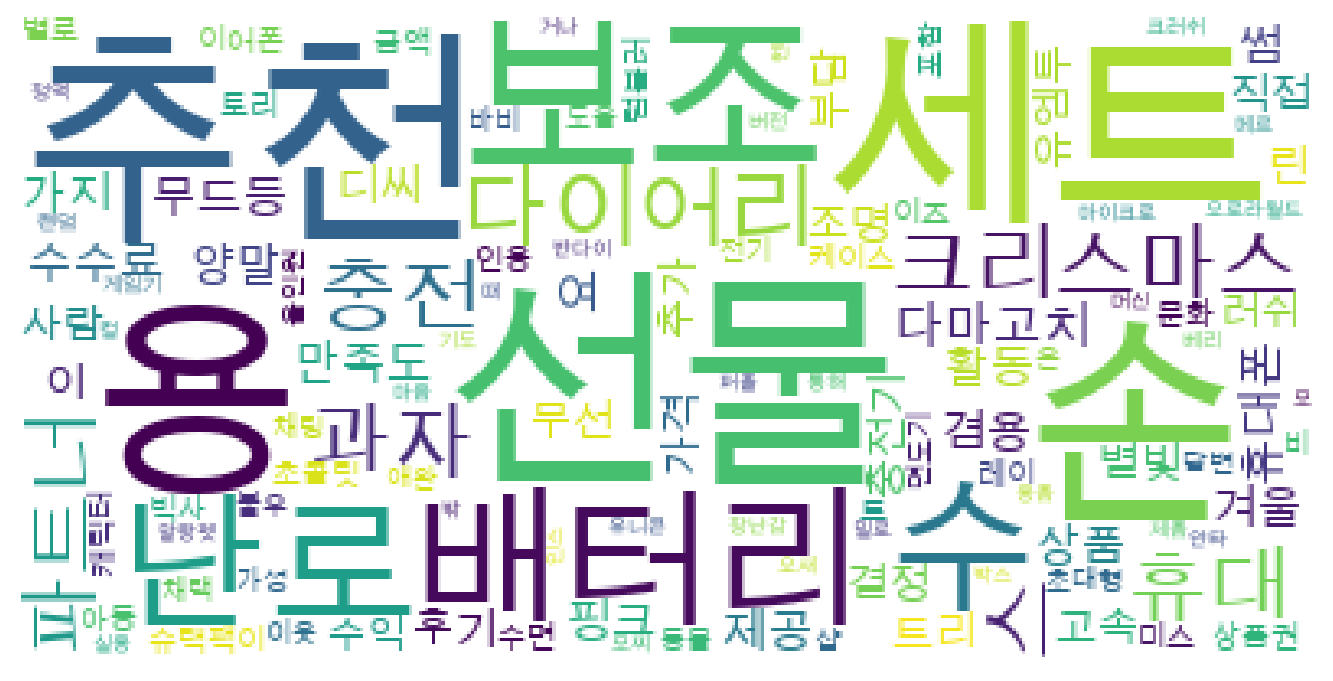

In [37]:
from wordcloud import WordCloud
data = ko.vocab().most_common(200)

# wordcloud
from wordcloud import WordCloud

data = ko.vocab().most_common(200)
f_path = "/Library/Fonts/Arial Unicode.ttf"

wordcloud = WordCloud(font_path=f_path,
                      relative_scaling = 0.2,
                      background_color = 'white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()